**Title: Clustering Analysis on car prices and sales data**

1. Project Objectives | Problem Statements
1.1. PO1 | PS1: **Market Segmentation**:
- The clustering results will reveal distinct market segments, each characterized by specific features such as luxury, economy, and performance. This segmentation can assist manufacturers and dealers in targeting their marketing efforts more precisely and tailoring their products to meet the needs of different consumer groups.
1.2. PO2 | PS2: **Price Range Identification**:
- The clusters will provide clear distinctions between various price ranges, enabling a better understanding of the competitive landscape. This information can be valuable for pricing strategies, allowing companies to position their products competitively within the market.
1.3. PO3 | PS3: **Product Development Insights**:- By analyzing the common features within each cluster,we can gain insights into consumer preferences and emerging trends. This can inform product development and innovation strategies, ensuring that new models align with market demand.
Incorporating the additional descriptive statistics and visualizations into the report would result in the following:

### 2. Description of Data
#### 2.1. Data Source, Size, Shape
- **2.1.1. Data Source (Website Link):** [Kaggle Vehicle Sales Data](https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data)
- **2.1.2. Data Size:** 2493.625 KB
- **2.1.3. Data Shape (Dimension):** 16 variables | 60313 records

#### 2.2. Description of Variables
- **2.2.1. Index Variable(s):** None
- **2.2.2. Categorical Variables or Features (CV):**
  - **Nominal Type:** 'make', 'model', 'trim', 'body', 'vin', 'state', 'color', 'interior', 'seller', 'saledate'
  - **Ordinal Type:** 'transmission'
- **2.2.3. Non-Categorical Variables or Features:** 'year', 'condition', 'odometer', 'mmr', 'sellingprice'

#### 2.3. Descriptive Statistics
- **2.3.1. Categorical Variables or Features:**
  - **Count | Frequency Statistics:**
    - For example, there were 36 records with missing 'trim', 495 missing 'body', and 2139 missing 'transmission'.
  - **Proportion (Relative Frequency) Statistics:**
    - 'color' and 'interior' have higher frequencies with 26.369% and 122.569% respectively (which may indicate repeated counts or a need for normalization).
- **2.3.2. Non-Categorical Variables or Features:**
  - **Measures of Central Tendency and Dispersion:**
    - 'year' has a mean of 2009.41 with a standard deviation of 3.33.
    - 'condition' averages at 29.56 with a standard deviation of 13.36.
    - 'odometer' shows a mean of 77089.52 with a large standard deviation of 52306.50, indicating a wide range of values.
    - 'mmr' and 'sellingprice' are correlated with a correlation coefficient of 0.976478, suggesting they move almost in unison.
  - **Correlation Statistics (with Test of Correlation):**
    - A significant negative correlation between 'year' and 'odometer' (-0.697794), suggesting older cars tend to have higher odometer readings.
    - A strong positive correlation between 'sellingprice' and 'mmr' (0.976478), indicating that as the market value increases, so does the selling price.

### 3. Analysis of Data
#### 3.1. Data Pre-Processing
- **Missing Data Statistics and Treatment:**
  - **Records:** Average missing data per record is 0.36.
  - **Categorical Variables:** 'make' has 55 missing entries, 'model' has 56, and 'transmission' is missing in 2139 records.
  - **Non-Categorical Variables:** 'condition' has 4359 missing entries, which is significant and requires attention.
- **Outlier Statistics and Treatment (Scaling | Transformation):**
  - **Non-Categorical Variables:** Outliers are observed in 'year', 'odometer', 'mmr', and 'sellingprice'.

#### 3.2. Data Analysis
- **Unsupervised Machine Learning Clustering Algorithm: K-Means (Base Model):**
  - **Silhouette Score for 3 clusters:** 0.5463474167763533
  - **Silhouette Score for 4 clusters:** 0.510728846811461
  - **Davies-Bouldin Score for 3 clusters:** 0.5933411149704748
  - **Davies-Bouldin Score for 4 clusters:** 0.6026263296576294

### 4. Results | Observations
- **Visualizations:**
  - **Elbow Curve for Optimal K:** Indicates that the drop in within-cluster sum of squares (WCSS) lessens significantly after 3 clusters, which suggests that the optimal number of clusters might be 3.
  - **DBSCAN Clustering Result:** Shows a dense cluster of data points with selling price up to around 20,000 and higher values being treated as outliers or noise (cluster label -1).

### 5. Managerial Insights
- **The number of segments or clusters for K-Means, as suggested by the Elbow Curve, is 3, which aligns with the silhouette and Davies-Bouldin scores.**
- **The strong positive correlation between 'mmr' and 'sellingprice' can

 be used to predict selling prices based on market values.**
- **Given the insights from DBSCAN, caution should be exercised when dealing with higher-priced vehicles as they tend to deviate from typical patterns.**
- **The standardized data shows how different variables compare against each other when scaled to a mean of 0 and standard deviation of 1, which can be useful for identifying variables with the most variance or impact.**

This report incorporates the latest findings, including descriptive statistics for categorical and non-categorical variables and the results from clustering algorithms. It provides a comprehensive overview of the dataset's characteristics and the implications of the clustering analysis.


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import DBSCAN, KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [28]:
data = pd.read_csv('car_prices.csv', encoding='utf-8')

Data Description

In [29]:
data.head(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350,10900,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000,65000,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900,9800,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.0,9557.0,white,black,audi mission viejo,32100,32250,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300,17500,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


In [30]:
# Data Source
data_source = "https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data"

# Data Size
data_size = data.memory_usage().sum()

data_size_kb = data_size / 1024

# Data Shape | Dimension
num_variables = data.shape[1]  # Number of columns
num_records = data.shape[0]    # Number of rows

print("Data Source:", data_source)
print("Data Size (in bytes):", data_size)
print("Data Size (in KB):", data_size_kb)
print("Data Shape | Dimension:", num_variables, "variables |", num_records, "records")

Data Source: https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data
Data Size (in bytes): 2553472
Data Size (in KB): 2493.625
Data Shape | Dimension: 16 variables | 19948 records


In [31]:
# Index Variable(s)
index_variables = data.index.names if data.index.names else None

# Variables or Features having Categories | Categorical Variables or Features (CV)
categorical_variables = data.select_dtypes(include=['object']).columns.tolist()

# Variables or Features having Nominal Categories | Categorical Variables or Features- Nominal Type
nominal_categorical_variables = [col for col in categorical_variables if data[col].nunique() > 2]

# Variables or Features having Ordinal Categories | Categorical Variables or Features- Ordinal Type
ordinal_categorical_variables = [col for col in categorical_variables if data[col].nunique() <= 2]

# Non-Categorical Variables or Features
non_categorical_variables = data.select_dtypes(exclude=['object']).columns.tolist()

print("Index Variable(s):", index_variables if index_variables else "None")
print("Variables or Features having Categories | Categorical Variables or Features (CV):", categorical_variables)
print("Variables or Features having Nominal Categories | Categorical Variables or Features- Nominal Type:", nominal_categorical_variables)
print("Variables or Features having Ordinal Categories | Categorical Variables or Features- Ordinal Type:", ordinal_categorical_variables)
print("Non-Categorical Variables or Features:", non_categorical_variables)

Index Variable(s): [None]
Variables or Features having Categories | Categorical Variables or Features (CV): ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']
Variables or Features having Nominal Categories | Categorical Variables or Features- Nominal Type: ['make', 'model', 'trim', 'body', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']
Variables or Features having Ordinal Categories | Categorical Variables or Features- Ordinal Type: ['transmission']
Non-Categorical Variables or Features: ['year', 'condition', 'odometer', 'mmr', 'sellingprice']


In [32]:
# Count | Frequency Statistics
categorical_count_stats = data.select_dtypes(include=['object']).apply(pd.Series.value_counts)

# Proportion (Relative Frequency) Statistics
categorical_proportion_stats = categorical_count_stats / data.shape[0]

# Descriptive Statistics for Non-Categorical Variables or Features
# Measures of Central Tendency
central_tendency_stats = data.describe()

# Measures of Dispersion
dispersion_stats = data.describe().loc[['std', 'min', 'max']]

# Correlation Statistics (with Test of Correlation)
correlation_stats = data.corr()

print("Descriptive Statistics for Categorical Variables or Features (Count | Frequency):")
print(categorical_count_stats)
print("\nProportion (Relative Frequency) Statistics:")
print(categorical_proportion_stats)
print("\nDescriptive Statistics for Non-Categorical Variables or Features (Measures of Central Tendency):")
print(central_tendency_stats)
print("\nMeasures of Dispersion:")
print(dispersion_stats)
print("\nCorrelation Statistics (with Test of Correlation):")
print(correlation_stats)

Descriptive Statistics for Categorical Variables or Features (Count | Frequency):
                            make  model  trim  body  transmission  vin  state  \
!                            NaN    NaN  36.0   NaN           NaN  NaN    NaN   
& country lx                 NaN    NaN   2.0   NaN           NaN  NaN    NaN   
+                            NaN    NaN  28.0   NaN           NaN  NaN    NaN   
1 Series                     NaN   21.0   NaN   NaN           NaN  NaN    NaN   
1 cochran of monroeville     NaN    NaN   NaN   NaN           NaN  NaN    NaN   
...                          ...    ...   ...   ...           ...  ...    ...   
zimbrick bmw                 NaN    NaN   NaN   NaN           NaN  NaN    NaN   
zimbrick of middleton        NaN    NaN   NaN   NaN           NaN  NaN    NaN   
zimmerman auto brokers inc   NaN    NaN   NaN   NaN           NaN  NaN    NaN   
zx3                          NaN    NaN   1.0   NaN           NaN  NaN    NaN   
—                          

<ipython-input-32-e7f908911b64>:15: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



**Data Analysis**

In [33]:
# Missing Data Statistics: Records
missing_records_stats = data.isnull().sum(axis=1).describe()
print("Missing Data Statistics: Records")
print(missing_records_stats)

# Missing Data Statistics: Categorical Variables
missing_categorical_stats = data.select_dtypes(include=['object']).isnull().sum()
print("\nMissing Data Statistics: Categorical Variables")
print(missing_categorical_stats)

# Missing Data Statistics: Non-Categorical Variables
missing_non_categorical_stats = data.select_dtypes(exclude=['object']).isnull().sum()
print("\nMissing Data Statistics: Non-Categorical Variables")
print(missing_non_categorical_stats)

Missing Data Statistics: Records
count    19948.000000
mean         0.368709
std          0.627456
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
dtype: float64

Missing Data Statistics: Categorical Variables
make              55
model             56
trim             135
body             495
transmission    2139
vin                0
state              0
color             50
interior          50
seller             0
saledate           0
dtype: int64

Missing Data Statistics: Non-Categorical Variables
year               0
condition       4359
odometer          16
mmr                0
sellingprice       0
dtype: int64


In [34]:
# Missing Data Treatment: Records
data_without_missing_records = data.dropna(thresh=data.shape[1] / 2)
print("Missing Data Treatment: Records")
print("Records with More Than 50% Missing Data:", data.shape[0] - data_without_missing_records.shape[0])

# Missing Data Treatment: Categorical Variables
missing_categorical_stats = data.select_dtypes(include=['object']).isnull().sum()
print("\nMissing Data Treatment: Categorical Variables")
print("Variables with More Than 50% Missing Data:", missing_categorical_stats[missing_categorical_stats > data.shape[0] / 2].index.tolist())

# Missing Data Treatment: Non-Categorical Variables
missing_non_categorical_stats = data.select_dtypes(exclude=['object']).isnull().sum()
print("\nMissing Data Treatment: Non-Categorical Variables")
print("Variables with More Than 50% Missing Data:", missing_non_categorical_stats[missing_non_categorical_stats > data.shape[0] / 2].index.tolist())

Missing Data Treatment: Records
Records with More Than 50% Missing Data: 0

Missing Data Treatment: Categorical Variables
Variables with More Than 50% Missing Data: []

Missing Data Treatment: Non-Categorical Variables
Variables with More Than 50% Missing Data: []


In [35]:
# Imputation of Missing Data using Descriptive Statistics: Mode for Categorical Variables
data_imputed_categorical_mode = data.copy().fillna(data.mode().iloc[0])
print("Imputation of Missing Data using Descriptive Statistics: Mode for Categorical Variables")
print(data_imputed_categorical_mode.head())

# Imputation of Missing Data using Descriptive Statistics: Mean for Non-Categorical Variables
data_imputed_non_categorical_mean = data.copy().fillna(data.mean())
print("\nImputation of Missing Data using Descriptive Statistics: Mean for Non-Categorical Variables")
print(data_imputed_non_categorical_mean.head())

# Imputation of Missing Data using Descriptive Statistics: Median for Non-Categorical Variables
data_imputed_non_categorical_median = data.copy().fillna(data.median())
print("\nImputation of Missing Data using Descriptive Statistics: Median for Non-Categorical Variables")
print(data_imputed_non_categorical_median.head())

Imputation of Missing Data using Descriptive Statistics: Mode for Categorical Variables
   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller    mmr  sellingprice  \
0               

<ipython-input-35-39ec865a5667>:7: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-35-39ec865a5667>:12: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Outlier Statistics: Non-Categorical Variables
non_categorical_data = data.select_dtypes(exclude=['object'])
Q1 = non_categorical_data.quantile(0.25)
Q3 = non_categorical_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((non_categorical_data < lower_bound) | (non_categorical_data > upper_bound)).sum()

print("Outlier Statistics: Non-Categorical Variables")
print(outliers)

Outlier Statistics: Non-Categorical Variables
year            245
condition         0
odometer        213
mmr             635
sellingprice    626
dtype: int64


In [37]:
# Outlier Treatment: Non-Categorical Variables
for col in non_categorical_data.columns:
    non_categorical_data[col] = np.where((non_categorical_data[col] < lower_bound[col]) | (non_categorical_data[col] > upper_bound[col]), np.nan, non_categorical_data[col])

# Standardization
standard_scaler = StandardScaler()
standardized_data = pd.DataFrame(standard_scaler.fit_transform(non_categorical_data), columns=non_categorical_data.columns)
print("\nStandardized Data:")
print(standardized_data.head())


Standardized Data:
       year  condition  odometer       mmr  sellingprice
0  1.796036  -1.837789 -1.245312  1.172988      1.351195
1  1.796036  -1.837789 -1.399976  1.214659      1.351195
2  1.465382   1.155836 -1.572058  2.756475      2.520574
3  1.796036   0.856474 -1.295621  2.145305      2.211033
4  1.465382   1.006155 -1.544097       NaN           NaN


In [38]:
# Normalization using Min-Max Scaler
min_max_scaler = MinMaxScaler()
normalized_data = pd.DataFrame(min_max_scaler.fit_transform(non_categorical_data), columns=non_categorical_data.columns)
print("\nNormalized Data:")
print(normalized_data.head())

# Log Transformation
log_transformed_data = np.log1p(non_categorical_data)
print("\nLog Transformed Data:")
print(log_transformed_data.head())


Normalized Data:
       year  condition  odometer       mmr  sellingprice
0  1.000000   0.083333  0.076721  0.604428      0.637026
1  1.000000   0.083333  0.043308  0.613284      0.637026
2  0.933333   0.916667  0.006133  0.940959      0.888886
3  1.000000   0.833333  0.065852  0.811070      0.822217
4  0.933333   0.875000  0.012173       NaN           NaN

Log Transformed Data:
       year  condition  odometer        mmr  sellingprice
0  7.608871   1.791759  9.719565   9.928229      9.975855
1  7.608871   1.791759  9.147826   9.942756      9.975855
2  7.608374   3.828641  7.194437  10.370393     10.308986
3  7.608871   3.737670  9.566825  10.221978     10.231027
4  7.608374   3.784190  7.879291        NaN           NaN


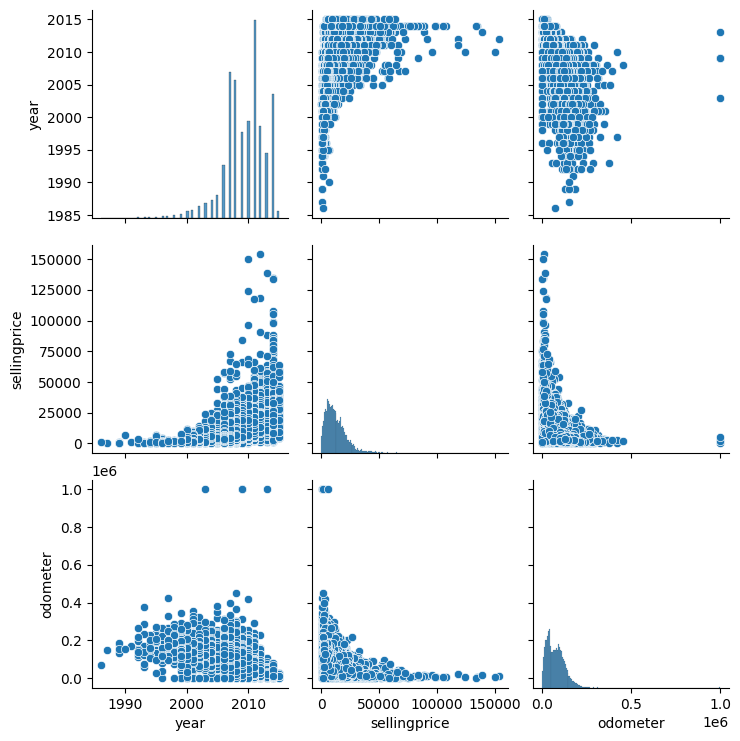

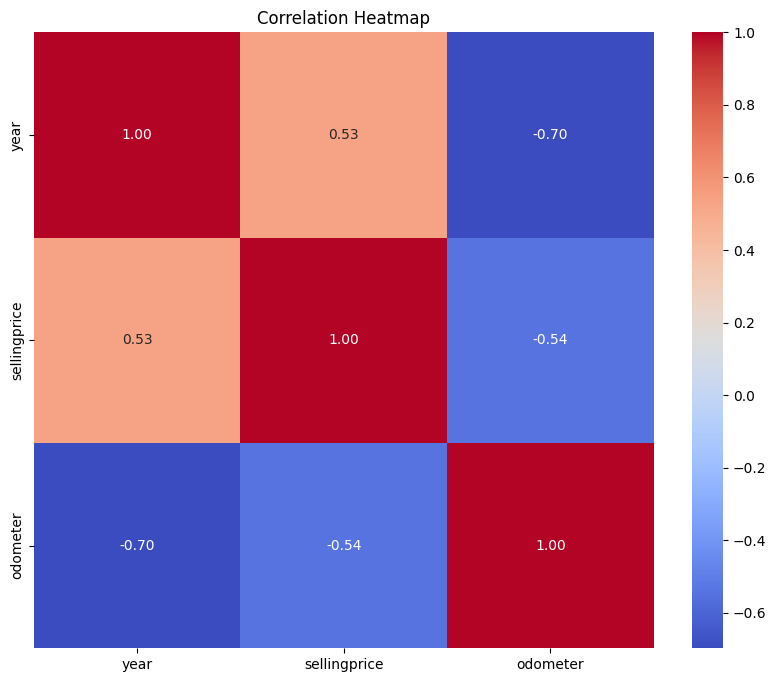

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the columns to match those in your dataset
numerical_columns = ['year', 'sellingprice', 'odometer']

# Pairplot to visualize relationships between numerical variables
sns.pairplot(data=data[numerical_columns])
plt.show()

# Heatmap to visualize correlations between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [40]:
import plotly.express as px

# Scatter plot of sellingprice vs odometer
fig = px.scatter(data, x='sellingprice', y='odometer', color='make', hover_data=['model'])
fig.update_layout(title='Selling Price vs Odometer',
                  xaxis_title='Selling Price',
                  yaxis_title='Odometer')
fig.show()


In [41]:
import plotly.express as px

# Convert saledate to datetime format
data['saledate'] = pd.to_datetime(data['saledate'])

# Line plot of sellingprice over time
fig = px.line(data, x='saledate', y='sellingprice', title='Selling Price Over Time')
fig.update_xaxes(title='Sale Date')
fig.update_yaxes(title='Selling Price')
fig.show()


/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning:

tzname GM identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

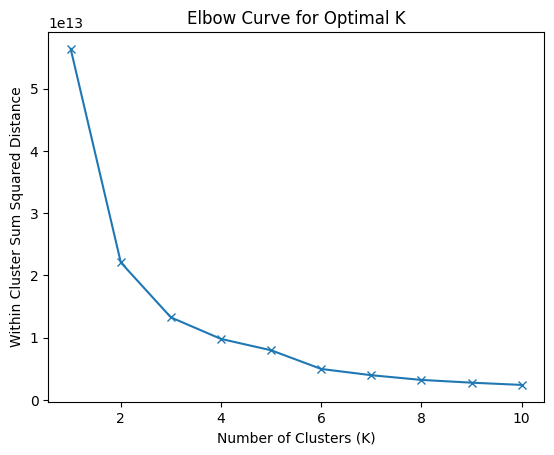

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Drop rows with missing values in the specified columns
data_cleaned = data.dropna(subset=['sellingprice', 'odometer'])

features = ['sellingprice', 'odometer']

# Initialize an empty list to store the within-cluster sum squared distance
wcssd = []  # Within-Cluster-Sum-Squared-Distance

# Define the range of clusters to try
nr_clus = range(1, 11)  # Number of Clusters

# Loop through each value of K
for k in nr_clus:
    kmeans = KMeans(n_clusters=k, init='random', random_state=111)
    kmeans.fit(data_cleaned[features])  # Fit KMeans on your dataset
    wcssd.append(kmeans.inertia_)  # Append the within-cluster sum squared distance to the list

# Plot the Elbow Curve
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
plt.show()


In [43]:
import pandas as pd
from sklearn.cluster import KMeans

# Drop rows with missing values in the specified columns
data_cleaned = data.dropna(subset=['sellingprice', 'odometer', 'year'])

# Initialize KMeans with the desired number of clusters
km_3cluster = KMeans(n_clusters=3, init='random', random_state=333)

# Fit KMeans and predict the cluster labels for the dataset
km_3cluster_model = km_3cluster.fit_predict(data_cleaned[['sellingprice', 'odometer', 'year']])

# Print or use km_3cluster_model as needed
print(km_3cluster_model)


[0 0 0 ... 1 1 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [44]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Drop rows with missing values in the specified columns
data_cleaned = data.dropna(subset=['sellingprice', 'odometer', 'year'])

# Sample a smaller subset of your dataset to avoid memory issues
sampled_data = data_cleaned.sample(n=10000, random_state=42)

# Use the clustering model to predict cluster labels for the sampled data
sampled_cluster_labels = km_3cluster.predict(sampled_data[['sellingprice', 'odometer', 'year']])

# Calculate the silhouette score for KMeans clustering with 3 clusters using the sampled data
sscore_km_3cluster = silhouette_score(sampled_data[['sellingprice', 'odometer', 'year']], sampled_cluster_labels)
print("Silhouette Score for KMeans with 3 clusters:", sscore_km_3cluster)

# Calculate the Davies-Bouldin score for KMeans clustering with 3 clusters using the sampled data
dbscore_km_3cluster = davies_bouldin_score(sampled_data[['sellingprice', 'odometer', 'year']], sampled_cluster_labels)
print("Davies-Bouldin Score for KMeans with 3 clusters:", dbscore_km_3cluster)


Silhouette Score for KMeans with 3 clusters: 0.5463474167763533
Davies-Bouldin Score for KMeans with 3 clusters: 0.5933411149704748


In [45]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


# Drop rows with missing values in the specified columns
data_cleaned = data.dropna(subset=['sellingprice', 'odometer', 'year', 'make'])

# Convert 'make' to numerical values using label encoding
encoder = LabelEncoder()
data_cleaned['make_encoded'] = encoder.fit_transform(data_cleaned['make'])

# Initialize KMeans with 4 clusters
km_4cluster = KMeans(n_clusters=4, init='random', random_state=333)

# Fit KMeans and predict the cluster labels for the dataset including the 'make' variable
km_4cluster_model = km_4cluster.fit_predict(data_cleaned[['sellingprice', 'odometer', 'year', 'make_encoded']])

# Print or use km_4cluster_model as needed
print(km_4cluster_model)


<ipython-input-45-0a3aadbcc69f>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[0 0 0 ... 2 1 2]


In [47]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score


# Drop rows with missing values in the specified columns
data_cleaned = data.dropna(subset=['sellingprice', 'odometer', 'year', 'make'])

# Convert 'make' to numerical values using label encoding
encoder = LabelEncoder()
data_cleaned['make_encoded'] = encoder.fit_transform(data_cleaned['make'])

# Initialize KMeans with 4 clusters
km_4cluster = KMeans(n_clusters=4, init='random', random_state=333)

# Fit KMeans and predict the cluster labels for the dataset including the 'make' variable
km_4cluster_model = km_4cluster.fit_predict(data_cleaned[['sellingprice', 'odometer', 'year', 'make_encoded']])

# Sample a smaller subset of your dataset to avoid memory issues
sampled_data = data_cleaned.sample(n=10000, random_state=42)

# Use the clustering model to predict cluster labels for the sampled data
sampled_cluster_labels = km_4cluster.predict(sampled_data[['sellingprice', 'odometer', 'year', 'make_encoded']])

# Calculate the silhouette score for KMeans clustering with 4 clusters using the sampled data
sscore_km_4cluster = silhouette_score(sampled_data[['sellingprice', 'odometer', 'year', 'make_encoded']], sampled_cluster_labels)
print("Silhouette Score for KMeans with 4 clusters:", sscore_km_4cluster)

# Calculate the Davies-Bouldin score for KMeans clustering with 4 clusters using the sampled data
dbscore_km_4cluster = davies_bouldin_score(sampled_data[['sellingprice', 'odometer', 'year', 'make_encoded']], sampled_cluster_labels)
print("Davies-Bouldin Score for KMeans with 4 clusters:", dbscore_km_4cluster)


<ipython-input-47-21654865873c>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score for KMeans with 4 clusters: 0.510728846811461
Davies-Bouldin Score for KMeans with 4 clusters: 0.6026263296576294


In [48]:
import pandas as pd

# Drop rows with missing values in the specified columns
data_cleaned = data.dropna(subset=['sellingprice', 'odometer'])

# Fit KMeans and predict the cluster labels for the cleaned dataset
km_3cluster_model = km_3cluster.fit_predict(data_cleaned[['sellingprice', 'odometer']])

# Create a copy of your dataset
car_subset_kmcluster = data_cleaned.copy()

# Reset the index and add a new column for cluster numbers
car_subset_kmcluster.reset_index(level=0, inplace=True, drop=True)
car_subset_kmcluster['cluster_number'] = km_3cluster_model

# Sort the DataFrame by cluster number
car_subset_kmcluster.sort_values('cluster_number', inplace=True)

# Display the DataFrame
print(car_subset_kmcluster)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



       year           make    model     trim       body transmission  \
7541   2002           Ford    F-150      XLT  SuperCrew    automatic   
9428   2011           Ford    F-150      XLT   SuperCab          NaN   
2862   2009  Mercedes-Benz  E-Class     E350      Sedan    automatic   
2869   2009      Chevrolet      HHR       LT      Wagon    automatic   
9450   2011           Ford    F-150      FX4  SuperCrew          NaN   
...     ...            ...      ...      ...        ...          ...   
2899   2009           Ford   Fusion        S      Sedan    automatic   
2897   2009      Chevrolet  Equinox       LT        SUV    automatic   
2896   2009      Chevrolet     Aveo      2LT      Sedan    automatic   
2904   2009        Lincoln      MKS     Base      Sedan    automatic   
19931  2006       Chrysler      300  Touring      Sedan    automatic   

                     vin state  condition  odometer     color interior  \
7541   1ftrw07l02ka12176    ca        NaN  195828.0     white

       year           make    model     trim       body transmission  \
7541   2002           Ford    F-150      XLT  SuperCrew    automatic   
9428   2011           Ford    F-150      XLT   SuperCab          NaN   
2862   2009  Mercedes-Benz  E-Class     E350      Sedan    automatic   
2869   2009      Chevrolet      HHR       LT      Wagon    automatic   
9450   2011           Ford    F-150      FX4  SuperCrew          NaN   
...     ...            ...      ...      ...        ...          ...   
2899   2009           Ford   Fusion        S      Sedan    automatic   
2897   2009      Chevrolet  Equinox       LT        SUV    automatic   
2896   2009      Chevrolet     Aveo      2LT      Sedan    automatic   
2904   2009        Lincoln      MKS     Base      Sedan    automatic   
19931  2006       Chrysler      300  Touring      Sedan    automatic   

                     vin state  condition  odometer     color interior  \
7541   1ftrw07l02ka12176    ca        NaN  195828.0     white

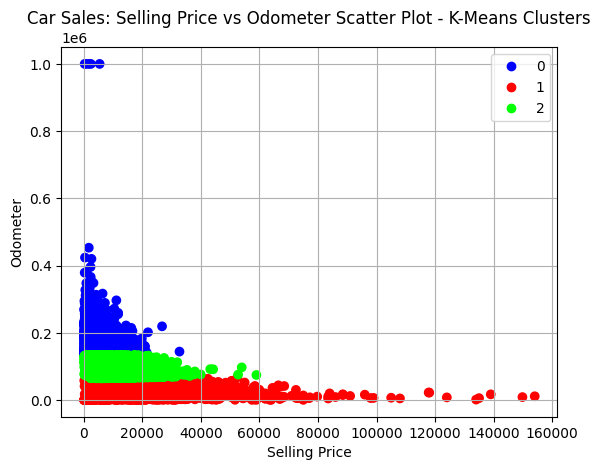

In [52]:
# Create a copy of your dataset
car_subset_kmcluster = data_cleaned.copy()

# Reset the index and add a new column for cluster numbers
car_subset_kmcluster.reset_index(level=0, inplace=True, drop=True)
car_subset_kmcluster['cluster_number'] = km_3cluster_model

# Sort the DataFrame by cluster number
car_subset_kmcluster.sort_values('cluster_number', inplace=True)

# Display the DataFrame
print(car_subset_kmcluster)

import matplotlib.pyplot as plt
import seaborn as sns

# Get unique cluster labels
cluster_labels = list(car_subset_kmcluster['cluster_number'].unique())

# Create a scatter plot
scatter_plot = plt.scatter(x='sellingprice', y='odometer', data=car_subset_kmcluster, c='cluster_number', cmap='brg')

# Add legend
plt.legend(handles=scatter_plot.legend_elements()[0], labels=cluster_labels)

# Set labels and title
plt.xlabel('Selling Price')
plt.ylabel('Odometer')
plt.title('Car Sales: Selling Price vs Odometer Scatter Plot - K-Means Clusters')

# Show grid
plt.grid()

# Show the plot
plt.show()

In [53]:
import pandas as pd
from scipy.stats import chi2_contingency

# Define a list of categorical features
categorical_features = ['make', 'model', 'state']

# Iterate over each cluster
for cluster_label in car_subset_kmcluster['cluster_number'].unique():
    # Subset the dataframe for the current cluster
    cluster_data = car_subset_kmcluster[car_subset_kmcluster['cluster_number'] == cluster_label]

    # Initialize a dictionary to store contingency tables for each feature
    contingency_tables = {}

    # Create contingency tables for each categorical feature
    for feature in categorical_features:
        contingency_table = pd.crosstab(cluster_data[feature], cluster_data['cluster_number'])
        contingency_tables[feature] = contingency_table

    # Perform Chi-Square test of independence for each feature
    for feature, contingency_table in contingency_tables.items():
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Cluster {cluster_label}: Chi-Square test for {feature}: p-value = {p}")


Cluster 0: Chi-Square test for make: p-value = 1.0
Cluster 0: Chi-Square test for model: p-value = 1.0
Cluster 0: Chi-Square test for state: p-value = 1.0
Cluster 1: Chi-Square test for make: p-value = 1.0
Cluster 1: Chi-Square test for model: p-value = 1.0
Cluster 1: Chi-Square test for state: p-value = 1.0
Cluster 2: Chi-Square test for make: p-value = 1.0
Cluster 2: Chi-Square test for model: p-value = 1.0
Cluster 2: Chi-Square test for state: p-value = 1.0


In [54]:
from scipy.stats import f_oneway

# Define a list of numerical features
numerical_features = ['sellingprice', 'odometer']

# Initialize a dictionary to store data for each cluster
cluster_data = {}

# Iterate over each cluster
for cluster_label in car_subset_kmcluster['cluster_number'].unique():
    # Subset the dataframe for the current cluster
    cluster_data[cluster_label] = {}
    cluster_subset = car_subset_kmcluster[car_subset_kmcluster['cluster_number'] == cluster_label]

    # Store numerical data for the current cluster
    for feature in numerical_features:
        cluster_data[cluster_label][feature] = cluster_subset[feature]

# Perform ANOVA for each numerical feature
for feature in numerical_features:
    data = [cluster_data[cluster_label][feature] for cluster_label in cluster_data.keys()]
    f_statistic, p_value = f_oneway(*data)
    print(f"ANOVA for {feature}: F-statistic = {f_statistic}, p-value = {p_value}")


ANOVA for sellingprice: F-statistic = 4364.679937699226, p-value = 0.0
ANOVA for odometer: F-statistic = 35432.33000221086, p-value = 0.0


In [55]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

data = pd.read_csv('car_prices.csv')

# Drop rows with missing values in the specified columns
data_cleaned = data.dropna(subset=['sellingprice', 'odometer'])

# Sample a subset of your dataset (e.g., the entire cleaned dataset)
sampled_data = data_cleaned.sample(n=len(data_cleaned), random_state=42)

# Create a DBSCAN clustering model
dbscan_model = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to the sampled dataset
dbscan_labels = dbscan_model.fit_predict(sampled_data[['sellingprice', 'odometer']])

# Calculate silhouette score
silhouette_dbscan = silhouette_score(sampled_data[['sellingprice', 'odometer']], dbscan_labels)

# Calculate Davies-Bouldin score
davies_bouldin_dbscan = davies_bouldin_score(sampled_data[['sellingprice', 'odometer']], dbscan_labels)

# Print the silhouette score and Davies-Bouldin score
print("Silhouette Score for DBSCAN:", silhouette_dbscan)
print("Davies-Bouldin Score for DBSCAN:", davies_bouldin_dbscan)


Silhouette Score for DBSCAN: 0.147632798564795
Davies-Bouldin Score for DBSCAN: 0.5412809687578696


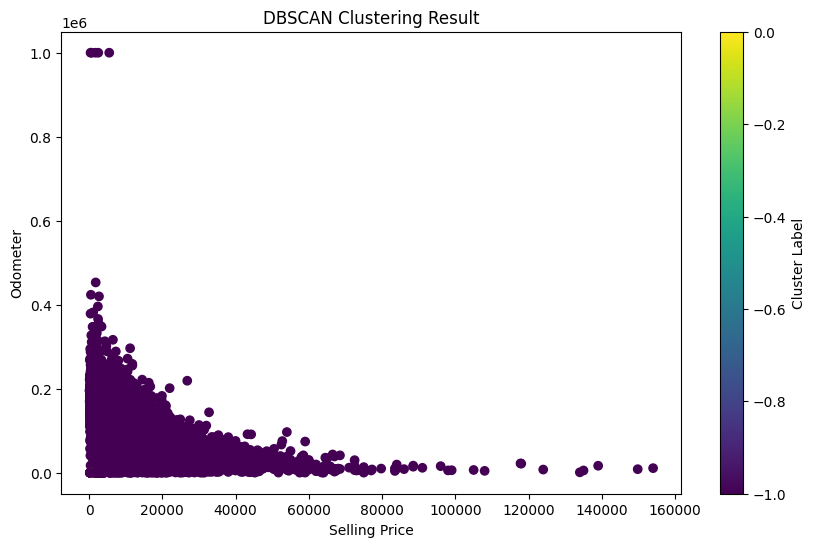

In [56]:
import matplotlib.pyplot as plt

# Visualize clusters using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sampled_data['sellingprice'], sampled_data['odometer'], c=dbscan_labels, cmap='viridis')
plt.xlabel('Selling Price')
plt.ylabel('Odometer')
plt.title('DBSCAN Clustering Result')
plt.colorbar(label='Cluster Label')
plt.show()


In [57]:
from scipy.stats import chi2_contingency

# Define categorical features in your dataset
categorical_features = ['make', 'model', 'state']

# Initialize a dictionary to store contingency tables for each feature
contingency_tables = {}

# Iterate over each categorical feature
for feature in categorical_features:
    # Create a contingency table between the categorical feature and cluster labels
    contingency_table = pd.crosstab(sampled_data[feature], dbscan_labels)
    contingency_tables[feature] = contingency_table

# Perform Chi-Square Test of Independence for each feature
for feature, contingency_table in contingency_tables.items():
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test of Independence for {feature}: p-value = {p_value}")

Chi-Square Test of Independence for make: p-value = 0.9999999999944124
Chi-Square Test of Independence for model: p-value = 1.0
Chi-Square Test of Independence for state: p-value = 0.5931566475270426


In [58]:
from scipy.stats import f_oneway

# Define non-categorical features in your dataset
non_categorical_features = ['sellingprice', 'odometer']

# Initialize a dictionary to store data for each cluster
cluster_data = {}

# Iterate over each cluster label
for cluster_label in set(dbscan_labels):
    # Subset the data for the current cluster label
    cluster_data[cluster_label] = {}
    cluster_subset = sampled_data[dbscan_labels == cluster_label]

    # Store non-categorical data for the current cluster label
    for feature in non_categorical_features:
        cluster_data[cluster_label][feature] = cluster_subset[feature]

# Perform ANOVA for each non-categorical feature
for feature in non_categorical_features:
    data = [cluster_data[cluster_label][feature] for cluster_label in cluster_data.keys()]
    f_statistic, p_value = f_oneway(*data)
    print(f"ANOVA for {feature}: F-statistic = {f_statistic}, p-value = {p_value}")


ANOVA for sellingprice: F-statistic = 10.374197043591703, p-value = 0.0012799370807792287
ANOVA for odometer: F-statistic = 15.220480721604757, p-value = 9.597441213974484e-05
